In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, normalize, RobustScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import Sequential
from sklearn.metrics import accuracy_score, roc_auc_score, RocCurveDisplay
from tensorflow.keras.regularizers import L2
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [25]:
train_df = pd.read_csv("../Data/Train.csv")

In [26]:
X = train_df.iloc[:,1:]
y = X.pop("CLASS")

In [27]:
X.head()

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,TOTAL_SCORE,AVG_SCORE
0,4,4,4,4,4,4,4,5,33,4.125
1,5,5,5,5,5,4,5,5,39,4.875
2,4,5,5,3,3,5,3,5,33,4.125
3,4,5,4,5,4,4,4,5,35,4.375
4,3,3,3,3,3,3,3,5,26,3.250


In [28]:
scaler= '../tools/power_transform.sav'
scaler = pickle.load(open(scaler, 'rb'))
X_train_scaled = scaler.transform(X)

In [29]:
model = Sequential()
model.add(InputLayer(shape=[X_train_scaled.shape[1],]))
model.add(Dense(128, activation='relu', activity_regularizer=L2(0.001)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=1e-3),loss='BinaryCrossentropy', metrics=['accuracy'])

In [31]:
history = model.fit(X_train_scaled, y, validation_split=0.2, epochs = 30)

Epoch 1/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5965 - loss: 0.8782 - val_accuracy: 0.6897 - val_loss: 0.7064
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7140 - loss: 0.6833 - val_accuracy: 0.7149 - val_loss: 0.6228
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7443 - loss: 0.6095 - val_accuracy: 0.7379 - val_loss: 0.5783
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7940 - loss: 0.5491 - val_accuracy: 0.7820 - val_loss: 0.5377
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8193 - loss: 0.5062 - val_accuracy: 0.7862 - val_loss: 0.4914
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8116 - loss: 0.4677 - val_accuracy: 0.8176 - val_loss: 0.4582
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8414 - loss: 0.4266 - val_accuracy: 0.8470 - val_loss: 0.4209
Epoch 8/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8513 - loss: 0.4031 - val_accuracy: 0.8512 - val_loss:

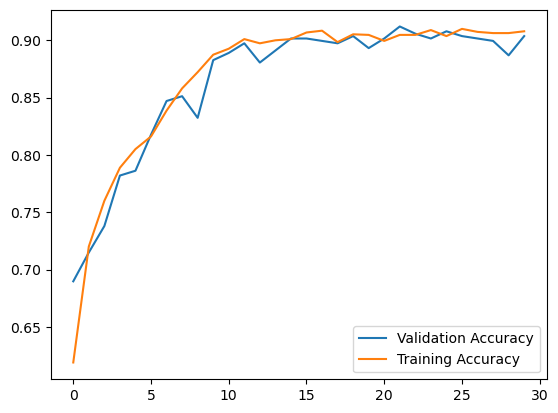

In [32]:
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.legend()
plt.show()

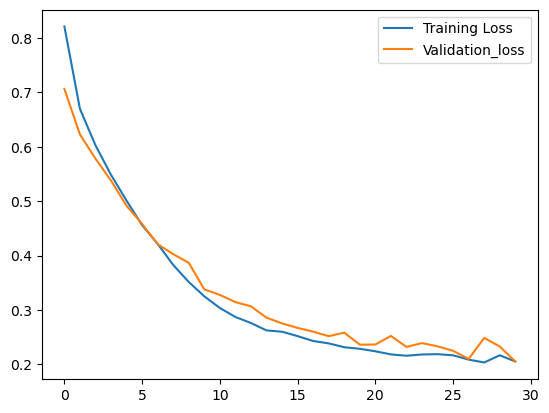

In [35]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation_loss')
plt.legend()
plt.show()

In [37]:
model.save("../Models/Philippine_Employability.keras")